<a href="https://colab.research.google.com/github/Jyoti-S-Shukla/Machine-learning-models/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification

  1. Support Vector Machines 
  2. K-Nearest Neighbors
  3. Classification on MNIST Digit 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Support Vector Machines (SVM)



1. Try to maximize the margin of separation between data.
2. Instead of learning wx+b=0  separating hyperplane directly (like logistic regression), SVM try to learn wx+b=0, such that, the margin between two hyperplanes wx+b=1 and wx+b=-1 (also known as support vectors) is maximum. 
3. Margin between wx+b=1 and wx+b=-1 hyperplane is $\frac{2}{||w||}$
4. we have a constraint optimization problem of maximizing $\frac{2}{||w||}$, with constraints wx+b>=1 (for +ve class) and wx+b<=-1 (for -ve class).
5. As $y_{i}=1$ for +ve class and $y_{i}=-1$ for -ve class, the constraint can be re-written as:
$$y(wx+b)>=1$$

6. Final optimization is (i.e to find w and b):
$$\min_{||w||}\frac{1}{2}||w||,$$
$$y(wx+b) \geq 1,~\forall ~data $$



Acknowledgement:

https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/

https://medium.com/deep-math-machine-learning-ai/chapter-3-1-svm-from-scratch-in-python-86f93f853dc

## Data generation:
1. Generate 2D gaussian data with fixed mean and variance for 2 class.(var=Identity, class1: mean[-4,-4], class2: mean[1,1], No. of data 25 from each class)
2. create the label matrix
3. Plot the generated data

(50, 2)
(50,)


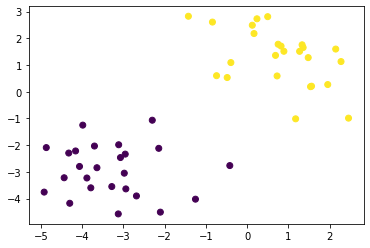

In [ ]:
No_sample=50
mean1=np.array([-3,-3])
var1=np.array([[1,0],[0,1]])
mean2=np.array([1,1])
var2=var1
data1=np.random.multivariate_normal(mean1,var1,int(No_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_sample/2))
X=np.concatenate((data1,data2))
print(X.shape)
y=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))
print(y.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1],marker='o',c=y)

Create a data dictionary, which contains both label and data points.

In [ ]:
postiveX=[]
negativeX=[]

## Write your code here
for i,v in enumerate(y):
    if v==-1:
        negativeX.append(X[i])
    else:
        postiveX.append(X[i])
#our data dictionary
data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)} 

## SVM training
1. create a search space for w (i.e w1=w2),[0, 0.5*max((abs(feat)))] and  for b, [-max((abs(feat))),max((abs(feat)))], with appropriate step.
2. we will start with a higher step and find optimal w and b, then we will reduce the step and again re-evaluate the optimal one.

3. In each step, we will take transform of w, [1,1], [-1,1],[1,-1] and [-1,-1] to search arround the w. 

4. In every pass (for a fixed step size) we will store all the w, b and its corresponding ||w||, which make the data correctly classified as per the condition $y(wx+b) \geq 1$. 

5. Obtain the optimal hyperplane having minimum ||w||.

6. Start with the optimal w and repeat the same (step 3,4 and 5) for a reduced step size.


In [ ]:
print(y)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [ ]:
max_feature_value=float('-inf')
min_feature_value=float('+inf')
        
for yi in data_dict:
    if np.amax(data_dict[yi])>max_feature_value:
        max_feature_value=np.amax(data_dict[yi])
                
    if np.amin(data_dict[yi])<min_feature_value:
        min_feature_value=np.amin(data_dict[yi])
        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01, max_feature_value * 0.001,]

In [ ]:
# it is just a searching algorithem, not a complicated optimization algorithem, (just for understanding of concepts through visualization)

def SVM_Training(data_dict):

    # insert your code here
    i=1
    global w
    global b
    # { ||w||: [w,b] }
    length_Wvector = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_step_size = 2
    b_multiple = 5
    w_optimum = max_feature_value*0.5

    for lrate in learning_rate:
        
        w = np.array([w_optimum,w_optimum])     
        optimized = False
        while not optimized:
            #b=[-maxvalue to maxvalue] we wanna maximize the b values so check for every b value
            for b in np.arange(-1*(max_feature_value*b_step_size), max_feature_value*b_step_size, lrate*b_multiple):
                for transformation in transforms:  # transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
                    w_t = w*transformation
                    
                    correctly_classified = True
                    
                    # every data point should be correct
                    for yi in data_dict:
                        for xi in data_dict[yi]:
                            if yi*(np.dot(w_t,xi)+b) < 1:  # we want  yi*(np.dot(w_t,xi)+b) >= 1 for correct classification
                                correctly_classified = False
                                
                    if correctly_classified:
                        length_Wvector[np.linalg.norm(w_t)] = [w_t,b] #store w, b for minimum magnitude
            
            if w[0] < 0:
                optimized = True
            else:
                w = w - lrate

        norms = sorted([n for n in length_Wvector])
        
        minimum_wlength = length_Wvector[norms[0]]
        w = minimum_wlength[0]
        b = minimum_wlength[1]
        
        w_optimum = w[0]+lrate*2
    
        return w,b


**Training**

In [ ]:
# All the required variables 
w=[] # Weights 2 dimensional vector
b=[] # Bias
w,b=SVM_Training(data_dict)
print(w)
print(b)

[0.84799178 0.84799178]
1.4133196371349346


## Visualization of the SVM separating hyperplanes (after training)

In [ ]:
def visualize(data_dict):
       
        plt.scatter(X[:,0],X[:,1],marker='o',c=y)

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane_value(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        
        hyp_x_min = np.min([np.min(data_dict[1]),np.min(data_dict[-1])])
        hyp_x_max = np.max([np.max(data_dict[1]),np.max(data_dict[-1])])

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane_value(hyp_x_min, w, b, 1)
        psv2 = hyperplane_value(hyp_x_max, w, b, 1)
        plt.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane_value(hyp_x_min, w, b, -1)
        nsv2 = hyperplane_value(hyp_x_max, w, b, -1)
        plt.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane_value(hyp_x_min, w, b, 0)
        db2 = hyperplane_value(hyp_x_max, w, b, 0)
        plt.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')
        
        
        

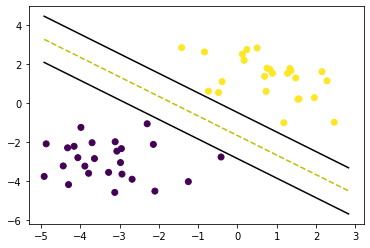

In [ ]:
fig = plt.figure()
visualize(data_dict)

**Testing**

In [ ]:
def predict(data,w,b):
  y_pred = np.sign(np.dot(np.array(data),w)+b)
  return y_pred

test accuracy= 100.0


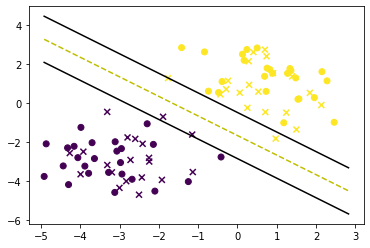

In [ ]:
No_test_sample=40
data1=np.random.multivariate_normal(mean1,var1,int(No_test_sample/2))
data2=np.random.multivariate_normal(mean2,var2,int(No_test_sample/2))
test_data=np.concatenate((data1,data2))
y_gr=np.concatenate((-1*np.ones(data1.shape[0]),np.ones(data2.shape[0])))

# evaluate with the trained model

y_pred = predict(test_data,w,b)
matched =0;
for i in range(No_test_sample):
  if(y_gr[i] == y_pred[i]):
    matched = matched +1
accuracy = (matched/No_test_sample)*100
print('test accuracy=',accuracy)

#  Visualization
plt.figure()
visualize(data_dict)
plt.scatter(test_data[:,0],test_data[:,1],marker='x',c=y_gr)


**Use the Sci-kit Learn Package and perform Classification on the above dataset using the SVM algorithm**

In [ ]:
## Write your code here
# "Support Vector Classifier"
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(X, y) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svc= clf.predict(test_data)
print(y_pred_svc)
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_gr, y_pred_svc))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.]
Accuracy: 1.0


#K-Nearest Neighbours (KNN)

Text(0.5, 1.0, 'Data visualization')

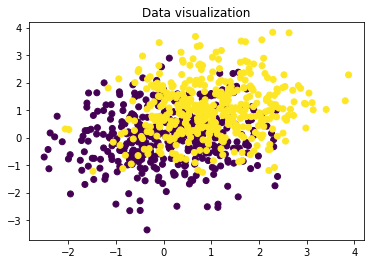

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mean1=np.array([0,0])
mean2=np.array([1,1])
var=np.array([[1,0.1],[0.1,1]])
np.random.seed(0)
data1=np.random.multivariate_normal(mean1,var,500)
data2=np.random.multivariate_normal(mean2,var,500)
data_train=np.concatenate((data1[:-100,],data2[:-100]))
label=np.concatenate((np.zeros(data1.shape[0]-100),np.ones(data2.shape[0]-100)))

plt.figure()
plt.scatter(data_train[:,0],data_train[:,1],c=label)
plt.title('Data visualization')

In [ ]:
def euclidean_distance(row1, row2):
  return np.linalg.norm(row1-row2)

In [ ]:
def get_neighbors(train, label_train,test_row, num_neighbors):
  ## write your code here
  neighbors = []
  for i,l in zip(train,label_train):
      neighbors.append([euclidean_distance(i,test_row),l])
  neighbors.sort()
  neighbors = neighbors[:num_neighbors]
  return neighbors

In [ ]:
def predict_classification(neighbors):
  ## write your code here
  uniqueLabels, count = np.unique(np.array(neighbors)[:,1], return_counts=True)
  prediction = int(uniqueLabels[count.argmax()])
  return prediction

In [ ]:
# test data generation
data_test=np.concatenate((data1[-100:],data2[-100:]))
label_test=np.concatenate((np.zeros(100),np.ones(100)))

In [ ]:
print(data_train)

[[-1.57668985 -1.03982262]
 [-2.22908837  0.77738534]
 [-0.72944014 -2.04059601]
 ...
 [ 2.15720954  1.41127735]
 [ 0.85710811  1.10323246]
 [ 1.1661146   1.53210936]]


In [ ]:
K=2

pred_label=np.zeros(data_test.shape[0])
for i in range(data_test.shape[0]):
  neig=get_neighbors(data_train,label,data_test[i,:], K)
  pred_label[i]=predict_classification(neig)

accuracy=(len(np.where(pred_label==label_test)[0])/len(label_test))*100
print('Testing Accuracy=',accuracy,'%')
print(pred_label[:5])
print(label_test[:5])

Testing Accuracy= 65.5 %
[0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0.]


In [ ]:
from scipy.stats import mode
class K_Nearest_Neighbors_Classifier() : 
      
    def __init__( self, K ) :
          
        self.K = K
          
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
          
        self.X_train = X_train
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X_train.shape
      
    # Function for prediction
          
    def predict( self, X_test ) :
          
        self.X_test = X_test
          
        # no_of_test_examples, no_of_features
          
        self.m_test, self.n = X_test.shape
          
        # initialize Y_predict
          
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) :
              
            x = self.X_test[i]
              
            # find the K nearest neighbors from current test example
              
            neighbors = np.zeros( self.K )
              
            neighbors = self.find_neighbors( x )
              
            # most frequent class in K neighbors
              
            Y_predict[i] = mode( neighbors )[0][0]    
              
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current 
        # test example x and training set X_train
          
        euclidean_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.euclidean( x, self.X_train[i] )
              
            euclidean_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = euclidean_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]
      
    # Function to calculate euclidean distance
              
    def euclidean( self, x, x_train ) :
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) )
  
# Driver code
  
def main() :
      
    # Importing dataset
      
    #df = pd.read_csv( "diabetes.csv" )
  
    #X = df.iloc[:,:-1].values
  
    #Y = df.iloc[:,-1:].values
    X_train = data_train
    Y_train = label
    X_test = data_test
    Y_test = label_test  
      
    # Model training
      
    model = K_Nearest_Neighbors_Classifier( K = 2 )
      
    model.fit( X_train, Y_train )
      
    #model1 = KNeighborsClassifier( n_neighbors = 3 )
      
    #model1.fit( X_train, Y_train )
      
    # Prediction on test set
  
    Y_pred = model.predict( X_test )
      
    #Y_pred1 = model1.predict( X_test )
      
    # measure performance
      
    correctly_classified = 0      
    # counter
      
    count = 0
      
    for count in range( np.size( Y_pred ) ) :
          
        if Y_test[count] == Y_pred[count] :
              
            correctly_classified = correctly_classified + 1              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", ( 
      correctly_classified / count ) * 100 )      
      
if __name__ == "__main__" : 
      
    main()

Accuracy on test set by our model       :   65.5


**Use the Sci-kit Learn Package and perform Classification on the above dataset using the K-Nearest Neighbour algorithm**

In [ ]:
## Write your code here
from sklearn.neighbors import KNeighborsClassifier
X_train = data_train
Y_train = label
X_test = data_test
Y_test = label_test
model1 = KNeighborsClassifier( n_neighbors = 2 )
model1.fit( X_train, Y_train)
Y_pred1 = model1.predict( X_test )
correctly_classified1 = 0      
    # counter      
count = 0      
for count in range( np.size( Y_pred1) ) :
  if Y_test[count] == Y_pred1[count] :
    correctly_classified1 = correctly_classified1 + 1              
    count = count + 1
print( "Accuracy on test set by sklearn model   :  ", ( 
      correctly_classified1 / count ) * 100 )

Accuracy on test set by sklearn model   :   65.5


#Classification on MNIST Digit Data

1. Read MNIST data and perform train-test split
2. Select any 2 Classes and perform classification task using SVM, KNN and Logistic Regression algorithms with the help of Sci-Kit Learn tool
3. Report the train and test accuracy and also display the results using confusion matrix
4. Repeat steps 2 and 3 for all 10 Classes and tabulate the results

In [ ]:
 !pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=4d045ed85ff74836b0e7e8142be89eaacf8f7c16495a291273500f02743025eb
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


In [ ]:
## Write your code here
import idx2numpy 
from keras.utils import np_utils 
img_path = "/content/t10k-images-idx3-ubyte"## write your code here 
label_path = "/content/t10k-labels-idx1-ubyte"## write your code here
Images = idx2numpy.convert_from_file(img_path) 
labels = idx2numpy.convert_from_file(label_path)

In [ ]:
X = Images
y = labels
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=123)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(9000, 28, 28) (1000, 28, 28) (9000,) (1000,)


In [ ]:
def pair_wise(cl):
  # for class 1
  id_1=np.where(y_train==cl[0])
  id1=id_1[0]
  #id1=id1[:50]
  Im_1=X_train[id1,:,:]
  lab_1=y_train[id1]
  # for class 5
  id_2=np.where(y_train==cl[1])
  id2=id_2[0]
  #id5=id5[:50]
  Im_2=X_train[id2,:,:]
  lab_2=y_train[id2]
  plt.imshow(Im_1[1,:,:])
  plt.figure()
  plt.imshow(Im_2[1,:,:])
  plt.figure()
  data=np.concatenate((Im_1,Im_2))
  data=np.reshape(data,(data.shape[0],data.shape[1]*data.shape[2]))
  print(data.shape)
  label_12=np.concatenate((lab_1,lab_2))
  print(label_12.shape)
  data = data.astype('float32')
  data /= 255

  # testing data
  id_1=np.where(y_test==cl[0])
  id1=id_1[0]
  #id1=id1[100:150]
  Im_1=X_test[id1,:,:]
  lab_1=y_test[id1]
  # for class 5
  id_2=np.where(y_test==cl[1])
  id2=id_2[0]
  #id5=id5[100:150]
  Im_2=X_test[id2,:,:]
  lab_2=y_test[id2]
  plt.imshow(Im_1[1,:,:])
  plt.figure()
  plt.imshow(Im_2[1,:,:])
  print(Im_2.shape)
  data_tst=np.concatenate((Im_1,Im_2))
  data_tst=np.reshape(data_tst,(data_tst.shape[0],data_tst.shape[1]*data_tst.shape[2]))
  tst_lab=np.concatenate((lab_1,lab_2))

  return data, label_12,data_tst,tst_lab
  

(1800, 784)
(1800,)
(103, 28, 28)


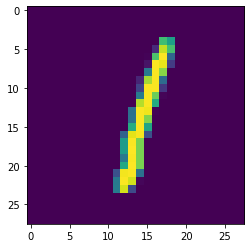

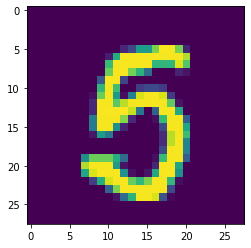

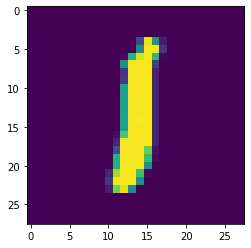

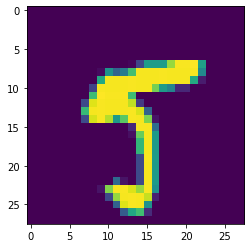

In [ ]:
data_train, label_train,data_test, label_test = pair_wise([1,5])

In [ ]:
def classifiers(k, data, label):
  from sklearn.neighbors import KNeighborsClassifier
  print("Training through KNN")
  knn = KNeighborsClassifier(n_neighbors=k)
  knn_fit= knn.fit(data, label)
  knn_training_accuracy = knn.score(data,label)*100
  print('KNN Training accuracy =',knn_training_accuracy)
  print("\n")

  print(" Training through SVM")
  from sklearn.svm import SVC  
  clf = SVC(kernel='linear') 
  # fitting x samples and y classes 
  svm_fit=clf.fit(data, label) 
  SVM_Training_accuracy = clf.score(data,label)*100
  print("SVM training accuracy",SVM_Training_accuracy )
  print("\n")

  print("Training through Logistic Regression")
  from sklearn.linear_model import LogisticRegression
  logistic_reg = LogisticRegression()
  logreg_fit =logistic_reg.fit(data, label)
  Logistic_training_accuracy = logistic_reg.score(data,label)*100
  print("Logisitc training accuracy",Logistic_training_accuracy)
  print("\n")

  return knn_training_accuracy,SVM_Training_accuracy,Logistic_training_accuracy,knn_fit, svm_fit, logreg_fit


In [ ]:
knn_training_accuracy,SVM_Training_accuracy,Logistic_training_accuracy,knn_fit, svm_fit, logreg_fit = classifiers(5,data_train,label_train)

Training through KNN
KNN Training accuracy = 99.72222222222223


 Training through SVM
SVM training accuracy 100.0


Training through Logistic Regression
Logisitc training accuracy 100.0




In [ ]:
def testing_classifiers(k,data_tst,tst_lab, knn_fit, svm_fit, logreg_fit):
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import plot_confusion_matrix
  from sklearn.svm import SVC  
  from sklearn.linear_model import LogisticRegression
  print("Testing through KNN")
  knn = KNeighborsClassifier(n_neighbors=k)
  knn = knn_fit
  knn_predicted = knn.predict(data_tst)
  # final testing
  knn_testing_accuracy = knn.score(data_tst,knn_predicted)*100
  print('KNN Testing accuracy =',knn_testing_accuracy)
  print("Confusion matrix for knn \n")
  # Generate confusion matrix
  knn_matrix = plot_confusion_matrix(knn_fit,data_tst,knn_predicted,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
  print("Confusion matrix for knn",knn_matrix)
  plt.title('Confusion matrix for knn classifier')
  plt.show(knn_matrix)
  plt.show()
  print("\n")

  print("Testing through SVM")
  clf = SVC(kernel='linear')
  clf = svm_fit
  svm_predicted= clf.predict(data_tst)
  #print(svm_predicted)
  from sklearn import metrics
  SVM_test_accuracy = metrics.accuracy_score(tst_lab, svm_predicted)*100
  print("Accuracy of testing with SVM:",SVM_test_accuracy)
  print("Confusion matrix for SVM")
  svm_matrix = plot_confusion_matrix(svm_fit,data_tst,svm_predicted,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
  print("Confusion matrix for svm",svm_matrix)
  plt.title('Confusion matrix for svm classifier')
  plt.show(svm_matrix)
  plt.show()
  print("\n")

  print("Testing through logistic regression")
  logistic_reg = LogisticRegression()
  logistic_reg = logreg_fit
  logreg_predicted = logistic_reg.predict(data_tst)
  #print(predictions)
  # Use score method to get accuracy of model
  Logistic_testing_accuracy = logistic_reg.score(data_tst,logreg_predicted)*100
  print("Accuracy of testing with logistic regression:",Logistic_testing_accuracy)
  print("Confusion matrix for SVM")
  logreg_matrix = plot_confusion_matrix(logreg_fit,data_tst,logreg_predicted,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
  print("Confusion matrix for logistic regression",logreg_matrix)
  plt.title('Confusion matrix for logistic regression classifier')
  plt.show(logreg_matrix)
  plt.show()
  #print("\n")
  
  return knn_predicted, knn_testing_accuracy, knn_matrix, svm_predicted, SVM_test_accuracy, svm_matrix,logreg_predicted,Logistic_testing_accuracy, logreg_matrix

Testing through KNN
KNN Testing accuracy = 100.0
Confusion matrix for knn 

Confusion matrix for knn <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8ce97d3850>


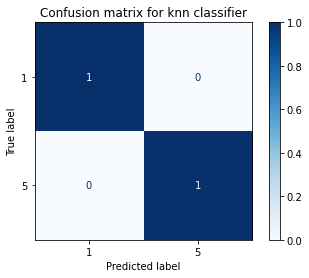



Testing through SVM
Accuracy of testing with SVM: 99.11894273127754
Confusion matrix for SVM
Confusion matrix for svm <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8ce99078d0>


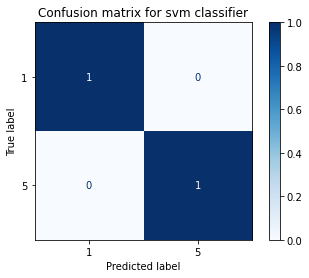



Testing through logistic regression
Accuracy of testing with logistic regression: 100.0
Confusion matrix for SVM
Confusion matrix for logistic regression <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8ce970b190>


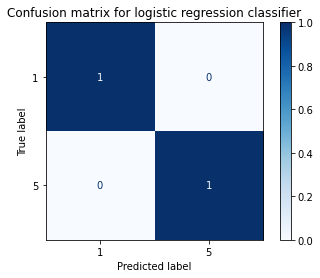

In [ ]:
knn_predicted, knn_testing_accuracy, knn_matrix, svm_predicted, SVM_test_accuracy, svm_matrix,logreg_predicted,Logistic_testing_accuracy, logreg_matrix = testing_classifiers(5,data_test,label_test,knn_fit,svm_fit,logreg_fit)

In [ ]:
correctly_classified1 = 0      
    # counter      
count = 0      
for count in range( np.size( tst_predicted) ) :
  if tst_lab[count] == tst_predicted[count] :
    correctly_classified1 = correctly_classified1 + 1              
    count = count + 1
print( "Accuracy on test set by sklearn model   :  ", ( 
      correctly_classified1 / count ) * 100 )

Accuracy on test set by sklearn model   :   100.0


(1898, 784)
(1898,)
(124, 28, 28)
Training through KNN
KNN Training accuracy = 99.89462592202318


 Training through SVM
SVM training accuracy 100.0


Training through Logistic Regression
Logisitc training accuracy 100.0


Testing through KNN
KNN Testing accuracy = 100.0
Confusion matrix for knn 

Confusion matrix for knn <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8ce9e83b90>


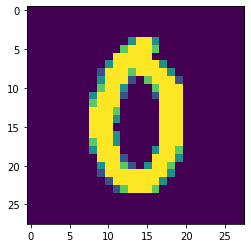

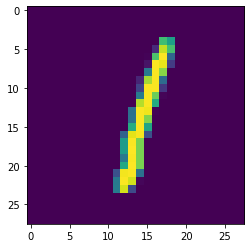

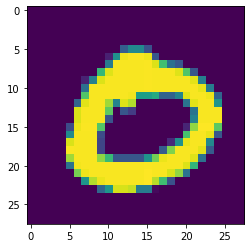

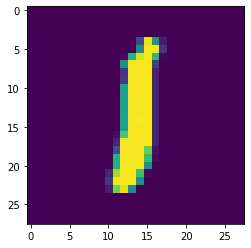

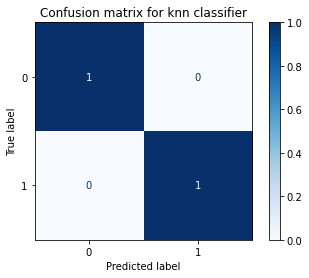



Testing through SVM
Accuracy of testing with SVM: 100.0
Confusion matrix for SVM
Confusion matrix for svm <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8cf1fda0d0>


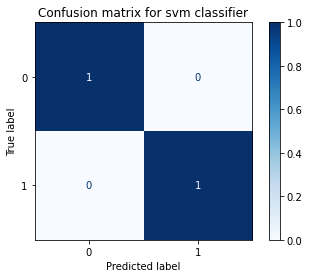



Testing through logistic regression
Accuracy of testing with logistic regression: 100.0
Confusion matrix for SVM
Confusion matrix for logistic regression <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8cf21542d0>


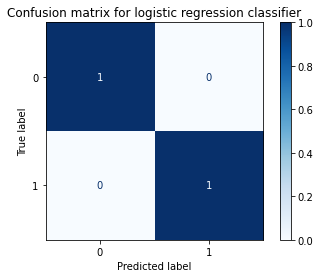

In [ ]:
# classifying 0 and 1
data_train,label_train,data_test, label_test = pair_wise([0,1])
knn_training_accuracy,SVM_Training_accuracy,Logistic_training_accuracy,knn_fit, svm_fit, logreg_fit = classifiers(5,data_train,label_train)
knn_predicted, knn_testing_accuracy, knn_matrix, svm_predicted, SVM_test_accuracy, svm_matrix,logreg_predicted,Logistic_testing_accuracy, logreg_matrix = testing_classifiers(5,data_test,label_test,knn_fit,svm_fit,logreg_fit)

(1923, 784)
(1923,)
(120, 28, 28)
Training through KNN
KNN Training accuracy = 99.21996879875195


 Training through SVM
SVM training accuracy 100.0


Training through Logistic Regression
Logisitc training accuracy 100.0


Testing through KNN
KNN Testing accuracy = 100.0
Confusion matrix for knn 

Confusion matrix for knn <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8ce938c990>


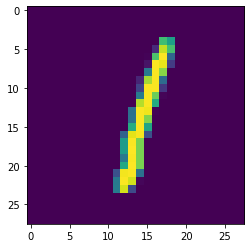

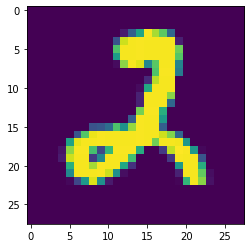

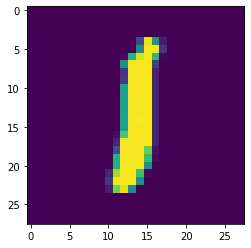

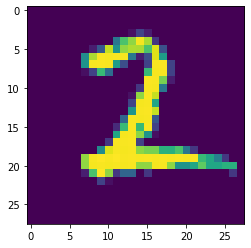

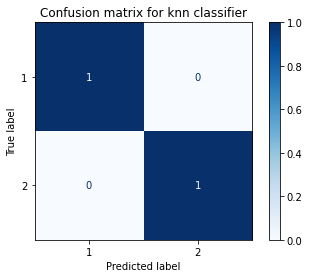



Testing through SVM
Accuracy of testing with SVM: 98.77049180327869
Confusion matrix for SVM
Confusion matrix for svm <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8ce9406090>


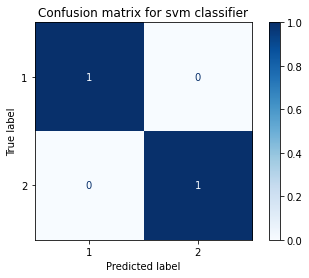



Testing through logistic regression
Accuracy of testing with logistic regression: 100.0
Confusion matrix for SVM
Confusion matrix for logistic regression <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8ce9129490>


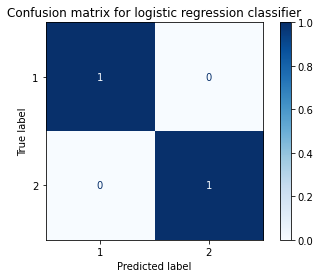

In [ ]:
# classifying 1 and 2
data_train,label_train,data_test, label_test = pair_wise([1,2])
knn_training_accuracy,SVM_Training_accuracy,Logistic_training_accuracy,knn_fit, svm_fit, logreg_fit = classifiers(5,data_train,label_train)
knn_predicted, knn_testing_accuracy, knn_matrix, svm_predicted, SVM_test_accuracy, svm_matrix,logreg_predicted,Logistic_testing_accuracy, logreg_matrix = testing_classifiers(5,data_test,label_test,knn_fit,svm_fit,logreg_fit)

(1804, 784)
(1804,)
(97, 28, 28)
Training through KNN
KNN Training accuracy = 99.66740576496674


 Training through SVM
SVM training accuracy 100.0


Training through Logistic Regression
Logisitc training accuracy 99.94456762749445


Testing through KNN
KNN Testing accuracy = 100.0
Confusion matrix for knn 

Confusion matrix for knn <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8ce90cfe10>


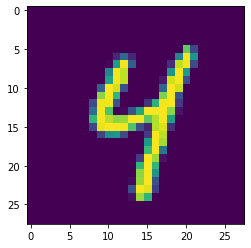

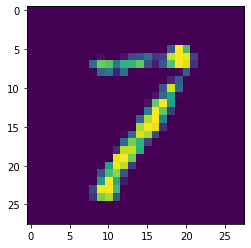

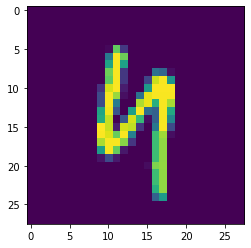

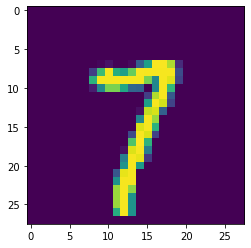

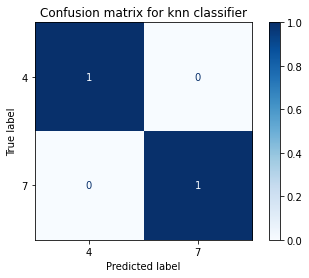



Testing through SVM
Accuracy of testing with SVM: 98.05825242718447
Confusion matrix for SVM
Confusion matrix for svm <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8ce8e5d5d0>


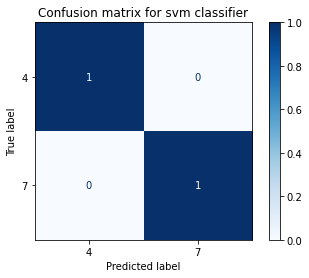



Testing through logistic regression
Accuracy of testing with logistic regression: 100.0
Confusion matrix for SVM
Confusion matrix for logistic regression <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f8ce92378d0>


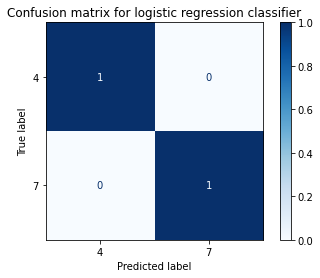

In [ ]:
# classifying 0 and 1
data_train,label_train,data_test, label_test = pair_wise([4,7])
knn_training_accuracy,SVM_Training_accuracy,Logistic_training_accuracy,knn_fit, svm_fit, logreg_fit = classifiers(5,data_train,label_train)
knn_predicted, knn_testing_accuracy, knn_matrix, svm_predicted, SVM_test_accuracy, svm_matrix,logreg_predicted,Logistic_testing_accuracy, logreg_matrix = testing_classifiers(5,data_test,label_test,knn_fit,svm_fit,logreg_fit)

In [ ]:
dummy_1 =X_train.reshape(len(X_train),-1) 
print(dummy_1.shape)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
print(X_train.shape)

(9000, 784)
(9000, 784)


In [ ]:
X_train = X_train/255

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("Training through KNN")
knn = KNeighborsClassifier(n_neighbors=5)
knn_fit= knn.fit(X_train, y_train)
knn_training_accuracy = knn.score(X_train,y_train)*100
print('KNN Training accuracy =',knn_training_accuracy)
print("\n")

print(" Training through SVM")
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
# fitting x samples and y classes 
svm_fit=clf.fit(X_train, y_train) 
SVM_Training_accuracy = clf.score(X_train,y_train)*100
print("SVM training accuracy",SVM_Training_accuracy )
print("\n")

print("Training through Logistic Regression")
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(max_iter=1000)
logreg_fit =logistic_reg.fit(X_train,y_train)
Logistic_training_accuracy = logistic_reg.score(X_train,y_train)*100
print("Logisitc training accuracy",Logistic_training_accuracy)
print("\n")

Training through KNN
KNN Training accuracy = 96.82222222222222


 Training through SVM
SVM training accuracy 99.86666666666667


Training through Logistic Regression
Logisitc training accuracy 97.63333333333334




In [ ]:
X_test = X_test.reshape(len(X_test),-1)
print(X_test.shape)

(1000, 784)


Testing through KNN
KNN Testing accuracy = 100.0
Confusion matrix for knn 

Confusion matrix for knn <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f3ca674a810>


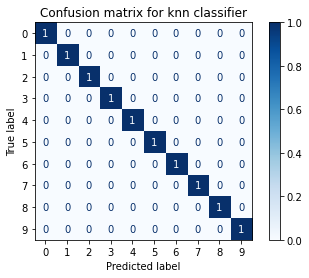



Testing through SVM
Accuracy of testing with SVM: 83.7
Confusion matrix for SVM
Confusion matrix for svm <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f3ca665b110>


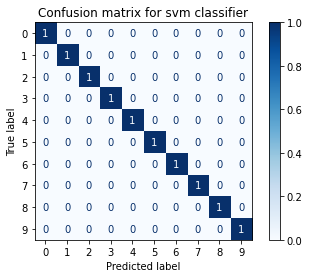



Testing through logistic regression
Accuracy of testing with logistic regression: 100.0
Confusion matrix for SVM
Confusion matrix for logistic regression <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7f3ca674a050>


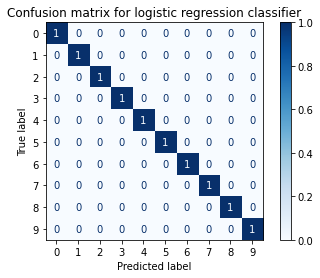

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
print("Testing through KNN")
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn_fit
knn_predicted = knn.predict(X_test)
# final testing
knn_testing_accuracy = knn.score(X_test,knn_predicted)*100
print('KNN Testing accuracy =',knn_testing_accuracy)
print("Confusion matrix for knn \n")
# Generate confusion matrix
knn_matrix = plot_confusion_matrix(knn_fit,X_test,knn_predicted,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
print("Confusion matrix for knn",knn_matrix)
plt.title('Confusion matrix for knn classifier')
plt.show(knn_matrix)
plt.show()
print("\n")

print("Testing through SVM")
clf = SVC(kernel='linear')
clf = svm_fit
svm_predicted= clf.predict(X_test)
#print(svm_predicted)
from sklearn import metrics
SVM_test_accuracy = metrics.accuracy_score(y_test, svm_predicted)*100
print("Accuracy of testing with SVM:",SVM_test_accuracy)
print("Confusion matrix for SVM")
svm_matrix = plot_confusion_matrix(svm_fit,X_test,svm_predicted,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
print("Confusion matrix for svm",svm_matrix)
plt.title('Confusion matrix for svm classifier')
plt.show(svm_matrix)
plt.show()
print("\n")

print("Testing through logistic regression")
logistic_reg = LogisticRegression()
logistic_reg = logreg_fit
logreg_predicted = logistic_reg.predict(X_test)
#print(predictions)
# Use score method to get accuracy of model
Logistic_testing_accuracy = logistic_reg.score(X_test,logreg_predicted)*100
print("Accuracy of testing with logistic regression:",Logistic_testing_accuracy)
print("Confusion matrix for SVM")
logreg_matrix = plot_confusion_matrix(logreg_fit,X_test,logreg_predicted,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
print("Confusion matrix for logistic regression",logreg_matrix)
plt.title('Confusion matrix for logistic regression classifier')
plt.show(logreg_matrix)
plt.show()
#print("\n")

In [ ]:
K=2

pred_label=np.zeros(X_test.shape[0])
for i in range(X_test.shape[0]):
  neig=get_neighbors(X_train,y_train,X_test[i,:], K)
  pred_label[i]=predict_classification(neig)

accuracy=(len(np.where(pred_label==y_test)[0])/len(y_test))*100
print('Testing Accuracy=',accuracy,'%')
print(pred_label[:5])
print(y_test[:5])

Testing Accuracy= 72.2 %
[0. 0. 2. 1. 1.]
[0 6 7 1 1]


In [ ]:
class logis_regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def logis(self,x,w_old):
    #print(x.T.shape)
    #print(w_old.shape)
    # write code here
    z = np.dot(x.T, w_old)
    op = 1 / (1 + np.exp(-z))
    return op

  def grad_update(self,w_old,lr,y,x):
    # write code here
    N = len(x)
    y_hat = self.logis(x, w_old)
    w_old -= lr * np.dot(x,  y_hat - y) / N 
    return w_old

  def error(self,w_old,y,x):
    predict_1 = y * np.log(self.logis(x,w_old))
    predict_0 = (1 - y) * np.log(1 - self.logis(x,w_old))
    return -sum(predict_1 + predict_0) / len(x)
    

  def Regression_grad_des(self,x,y,lr):
    diff1=1
    diff2=0
    loss = []
    w_old = np.random.rand(x.shape[0],1)
    #print(w_old.shape)
    for i in range(1000):
      # write code here
      diff1 = self.error(w_old,y,x)
      w_old = self.grad_update(w_old,lr,y,x)    
      diff2 = self.error(w_old,y,x)
      loss.append(diff1)
      w_pred = w_old
      err = loss
      dev=np.abs(diff1-diff2)
          
      if dev<=10**(-20):
        break

    return w_pred,err
  
  def predict(self, x,w_pred):
    # Predicting with sigmoid function
    
    # Returning binary result
    return [1 if i > 0.5 else 0 for i in self.logis(x,w_pred)]

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def fit(x, y, max_iter=1000, alpha=0.01):
    #x = np.insert(x, 0, 1, axis=1)
    w_pred_class = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        #print(binary_y)
        
        w_pred = np.zeros(x.shape[0])
        w_pred,error_grad=reg.Regression_grad_des(x,binary_y,alpha)
            
        w_pred_class.append(w_pred)
    return w_pred_class, classes, error_grad
def predict(classes, w_pred_class, x):
    #x = np.insert(x, 0, 1, axis=1)
    #print(x.shape)
    preds = [np.argmax(
        [sigmoid(w_pred.T@xi) for w_pred in w_pred_class]
    ) for xi in x]
    print(preds)
    return [classes[p] for p in preds]

In [ ]:
mean = np.mean(X_train, axis=0)
X_train = X_train - mean
X_test = X_test - mean
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

**Note : If you are interested, also try classifying MNIST digit data using the code you have written for SVM, KNN and Logistic Regression** 

  